## Problem 1 : Less data to train

### Solution : Data Augmentation

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading in the Emergency dataset

data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [3]:
# Checking the first 5 rows of the dataset

data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [4]:
# checking the shape of the dataset

data.shape

(2352, 2)

In [5]:
# Let's first check the number of images per class

data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [6]:
# Extracting the name and target of a random image in the data dataframe

random_id = 777 #index of random image 

img_name = data['image_names'].iloc[random_id]
target = data['emergency_or_not'].iloc[random_id]

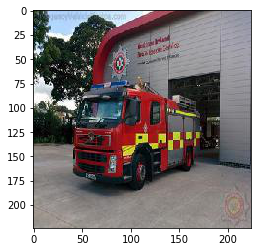

In [7]:
# Reading and plotting the random image

img = plt.imread('../datasets/emergency_classification/images/' + img_name)

plt.imshow(img)
plt.show()

In [8]:
# Checking shape of the image

img.shape

(224, 224, 3)

In [9]:
# Importing the ImageDataGenerator for Image Augmentation

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### Augmentations

1. rotation_range - Degree range for random rotations
2. width_shift_range - float or integer
3. height_shift_range - float or integer
4. horizontal_flip - Boolean

In [10]:
# Intializing the ImageDataGenerator object with the Augmentations that we want.

# 1. rotation_range

datagen = ImageDataGenerator(shear_range=0.5)

In [11]:
# Reshaping the image to allow for iteration

img = img.reshape((1,)+img.shape)

In [12]:
#checking the shape of the reshaped array

img.shape

(1, 224, 224, 3)

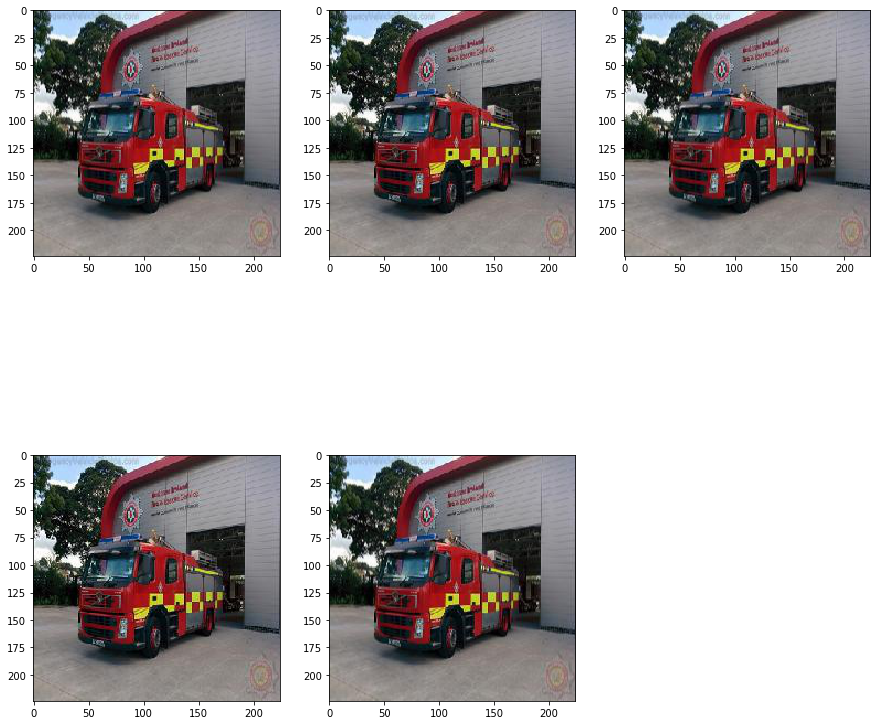

In [13]:
#Let's generate 5 randomly rotated images of our array.

f = plt.figure(figsize = (15,15))

count = 0
for x, y in datagen.flow(img,[target], batch_size=1):
    if count ==5:
        break
    
    count += 1
    f.add_subplot(230+count)
    plt.imshow(x.reshape(224,224,3).astype(int))
plt.show()

## Problem 2 - Lots of Variation in Data

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


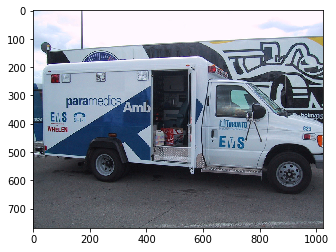

In [19]:
img = plt.imread('images/emergency_100.jpg')

plt.imshow(img)
plt.show()

In [20]:
img.shape

(768, 1024, 3)

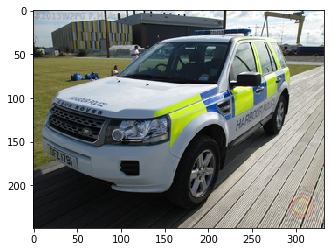

In [21]:
img = imread('images/emergency_1000.jpg')

pylab.imshow(img)
pylab.show()

In [22]:
img.shape

(249, 333, 3)

In [23]:
from keras.preprocessing import image

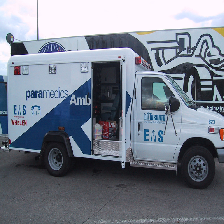

In [24]:
image.load_img('images/emergency_100.jpg', target_size=(224, 224))

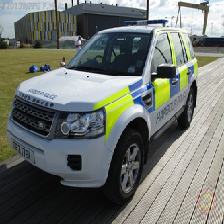

In [25]:
image.load_img('images/emergency_1000.jpg', target_size=(224, 224))

## Problem 3 - Overfitting

### Dropout

In [26]:
import pandas as pd

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

In [27]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [28]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [29]:
images = []
for img_loc in data.image_names:
    img = image.load_img('../datasets/emergency_classification/images/' + img_loc, target_size=(100, 100))
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [30]:
train_x = images.reshape(2352, 100*100*3)

In [31]:
train_x /= train_x.max()
train_y = data.emergency_or_not.values

In [32]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [33]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [34]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/500
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6798 - acc: 0.5893 - val_loss: 0.6582 - val_acc: 0.5652
Epoch 2/500
1646/1646 [==============================] - 0s 107us/step - loss: 0.6488 - acc: 0.6215 - val_loss: 0.6289 - val_acc: 0.6516
Epoch 3/500
1646/1646 [==============================] - 0s 107us/step - loss: 0.6241 - acc: 0.6501 - val_loss: 0.6147 - val_acc: 0.6799
Epoch 4/500
1646/1646 [==============================] - 0s 112us/step - loss: 0.6133 - acc: 0.6841 - val_loss: 0.6065 - val_acc: 0.6813
Epoch 5/500
1646/1646 [==============================] - 0s 111us/step - loss: 0.6050 - acc: 0.6829 - val_loss: 0.6158 - val_acc: 0.6615
Epoch 6/500
1646/1646 [==============================] - 0s 109us/step - loss: 0.6002 - acc: 0.6889 - val_loss: 0.6015 - val_acc: 0.6629
Epoch 7/500
1646/1646 [==============================] - 0s 110us/step - loss: 0.5898 - acc: 0.6932 - val_loss: 0.5892 - val_acc: 0.6

1646/1646 [==============================] - 0s 105us/step - loss: 0.4549 - acc: 0.7965 - val_loss: 0.5365 - val_acc: 0.7195
Epoch 61/500
1646/1646 [==============================] - 0s 98us/step - loss: 0.4506 - acc: 0.8080 - val_loss: 0.5445 - val_acc: 0.7110
Epoch 62/500
1646/1646 [==============================] - 0s 95us/step - loss: 0.4487 - acc: 0.8098 - val_loss: 0.6153 - val_acc: 0.6785
Epoch 63/500
1646/1646 [==============================] - 0s 95us/step - loss: 0.4625 - acc: 0.8026 - val_loss: 0.6054 - val_acc: 0.6870
Epoch 64/500
1646/1646 [==============================] - 0s 94us/step - loss: 0.4528 - acc: 0.8056 - val_loss: 0.5451 - val_acc: 0.7082
Epoch 65/500
1646/1646 [==============================] - 0s 98us/step - loss: 0.4583 - acc: 0.7977 - val_loss: 0.5978 - val_acc: 0.6870
Epoch 66/500
1646/1646 [==============================] - 0s 112us/step - loss: 0.4454 - acc: 0.8007 - val_loss: 0.5349 - val_acc: 0.7153
Epoch 67/500
1646/1646 [============================

1646/1646 [==============================] - 0s 110us/step - loss: 0.3774 - acc: 0.8463 - val_loss: 0.6905 - val_acc: 0.6615
Epoch 120/500
1646/1646 [==============================] - 0s 108us/step - loss: 0.3556 - acc: 0.8712 - val_loss: 0.5288 - val_acc: 0.7266
Epoch 121/500
1646/1646 [==============================] - 0s 108us/step - loss: 0.3873 - acc: 0.8354 - val_loss: 0.5379 - val_acc: 0.7337
Epoch 122/500
1646/1646 [==============================] - 0s 99us/step - loss: 0.4346 - acc: 0.7910 - val_loss: 0.5680 - val_acc: 0.7096
Epoch 123/500
1646/1646 [==============================] - 0s 93us/step - loss: 0.4314 - acc: 0.7953 - val_loss: 0.5564 - val_acc: 0.7181
Epoch 124/500
1646/1646 [==============================] - 0s 96us/step - loss: 0.3872 - acc: 0.8335 - val_loss: 0.5431 - val_acc: 0.7280
Epoch 125/500
1646/1646 [==============================] - 0s 96us/step - loss: 0.3692 - acc: 0.8518 - val_loss: 0.5299 - val_acc: 0.7210
Epoch 126/500
1646/1646 [====================

1646/1646 [==============================] - 0s 103us/step - loss: 0.3728 - acc: 0.8208 - val_loss: 0.7390 - val_acc: 0.6615
Epoch 179/500
1646/1646 [==============================] - 0s 109us/step - loss: 0.3589 - acc: 0.8323 - val_loss: 0.5434 - val_acc: 0.7351
Epoch 180/500
1646/1646 [==============================] - 0s 100us/step - loss: 0.3515 - acc: 0.8499 - val_loss: 0.5769 - val_acc: 0.7224
Epoch 181/500
1646/1646 [==============================] - 0s 108us/step - loss: 0.2756 - acc: 0.9089 - val_loss: 0.5656 - val_acc: 0.7280
Epoch 182/500
1646/1646 [==============================] - 0s 99us/step - loss: 0.3035 - acc: 0.8815 - val_loss: 0.5428 - val_acc: 0.7394
Epoch 183/500
1646/1646 [==============================] - 0s 99us/step - loss: 0.3536 - acc: 0.8348 - val_loss: 0.5692 - val_acc: 0.7323
Epoch 184/500
1646/1646 [==============================] - 0s 97us/step - loss: 0.3107 - acc: 0.8797 - val_loss: 0.5723 - val_acc: 0.7309
Epoch 185/500
1646/1646 [===================

1646/1646 [==============================] - 0s 103us/step - loss: 0.2631 - acc: 0.8967 - val_loss: 0.5916 - val_acc: 0.7167
Epoch 238/500
1646/1646 [==============================] - 0s 98us/step - loss: 0.4121 - acc: 0.8007 - val_loss: 0.5437 - val_acc: 0.7252
Epoch 239/500
1646/1646 [==============================] - 0s 108us/step - loss: 0.2209 - acc: 0.9405 - val_loss: 0.5703 - val_acc: 0.7309
Epoch 240/500
1646/1646 [==============================] - 0s 110us/step - loss: 0.2287 - acc: 0.9259 - val_loss: 0.6697 - val_acc: 0.6912
Epoch 241/500
1646/1646 [==============================] - 0s 111us/step - loss: 0.3537 - acc: 0.8360 - val_loss: 0.6361 - val_acc: 0.6898
Epoch 242/500
1646/1646 [==============================] - 0s 107us/step - loss: 0.3312 - acc: 0.8439 - val_loss: 0.6020 - val_acc: 0.7195
Epoch 243/500
1646/1646 [==============================] - 0s 104us/step - loss: 0.2141 - acc: 0.9368 - val_loss: 0.5366 - val_acc: 0.7465
Epoch 244/500
1646/1646 [=================

1646/1646 [==============================] - 0s 106us/step - loss: 0.1709 - acc: 0.9557 - val_loss: 0.5451 - val_acc: 0.7521
Epoch 297/500
1646/1646 [==============================] - 0s 107us/step - loss: 0.2073 - acc: 0.9228 - val_loss: 0.7768 - val_acc: 0.6346
Epoch 298/500
1646/1646 [==============================] - 0s 101us/step - loss: 0.2000 - acc: 0.9295 - val_loss: 0.5478 - val_acc: 0.7436
Epoch 299/500
1646/1646 [==============================] - 0s 112us/step - loss: 0.1912 - acc: 0.9392 - val_loss: 0.5951 - val_acc: 0.7195
Epoch 300/500
1646/1646 [==============================] - 0s 106us/step - loss: 0.1871 - acc: 0.9441 - val_loss: 0.8386 - val_acc: 0.6686
Epoch 301/500
1646/1646 [==============================] - 0s 100us/step - loss: 0.3220 - acc: 0.8481 - val_loss: 0.6630 - val_acc: 0.6813
Epoch 302/500
1646/1646 [==============================] - 0s 107us/step - loss: 0.2096 - acc: 0.9241 - val_loss: 0.5483 - val_acc: 0.7479
Epoch 303/500
1646/1646 [================

1646/1646 [==============================] - 0s 100us/step - loss: 0.1254 - acc: 0.9745 - val_loss: 0.5635 - val_acc: 0.7479
Epoch 356/500
1646/1646 [==============================] - 0s 107us/step - loss: 0.1279 - acc: 0.9751 - val_loss: 0.5893 - val_acc: 0.7295
Epoch 357/500
1646/1646 [==============================] - 0s 107us/step - loss: 0.1937 - acc: 0.9295 - val_loss: 0.5997 - val_acc: 0.7422
Epoch 358/500
1646/1646 [==============================] - 0s 106us/step - loss: 0.1498 - acc: 0.9593 - val_loss: 0.5685 - val_acc: 0.7479
Epoch 359/500
1646/1646 [==============================] - 0s 109us/step - loss: 0.1199 - acc: 0.9800 - val_loss: 0.5823 - val_acc: 0.7479
Epoch 360/500
1646/1646 [==============================] - 0s 109us/step - loss: 0.1318 - acc: 0.9672 - val_loss: 0.6012 - val_acc: 0.7436
Epoch 361/500
1646/1646 [==============================] - 0s 108us/step - loss: 0.2073 - acc: 0.9210 - val_loss: 1.0950 - val_acc: 0.5708
Epoch 362/500
1646/1646 [================

1646/1646 [==============================] - 0s 99us/step - loss: 0.4100 - acc: 0.8275 - val_loss: 0.6745 - val_acc: 0.7337
Epoch 415/500
1646/1646 [==============================] - 0s 95us/step - loss: 0.1067 - acc: 0.9842 - val_loss: 0.6093 - val_acc: 0.7465
Epoch 416/500
1646/1646 [==============================] - 0s 99us/step - loss: 0.0985 - acc: 0.9854 - val_loss: 0.5883 - val_acc: 0.7436
Epoch 417/500
1646/1646 [==============================] - 0s 95us/step - loss: 0.0930 - acc: 0.9891 - val_loss: 0.6294 - val_acc: 0.7493
Epoch 418/500
1646/1646 [==============================] - 0s 93us/step - loss: 0.0955 - acc: 0.9866 - val_loss: 0.6401 - val_acc: 0.7125
Epoch 419/500
1646/1646 [==============================] - 0s 97us/step - loss: 0.2944 - acc: 0.8797 - val_loss: 1.9459 - val_acc: 0.5836
Epoch 420/500
1646/1646 [==============================] - 0s 97us/step - loss: 0.2171 - acc: 0.9265 - val_loss: 0.6313 - val_acc: 0.7450
Epoch 421/500
1646/1646 [=======================

1646/1646 [==============================] - 0s 107us/step - loss: 0.0750 - acc: 0.9964 - val_loss: 0.6584 - val_acc: 0.7465
Epoch 474/500
1646/1646 [==============================] - 0s 109us/step - loss: 0.0758 - acc: 0.9933 - val_loss: 0.6175 - val_acc: 0.7280
Epoch 475/500
1646/1646 [==============================] - 0s 108us/step - loss: 0.0818 - acc: 0.9903 - val_loss: 0.6280 - val_acc: 0.7252
Epoch 476/500
1646/1646 [==============================] - 0s 104us/step - loss: 0.0757 - acc: 0.9933 - val_loss: 0.6201 - val_acc: 0.7394
Epoch 477/500
1646/1646 [==============================] - 0s 97us/step - loss: 0.0716 - acc: 0.9939 - val_loss: 0.6694 - val_acc: 0.7422
Epoch 478/500
1646/1646 [==============================] - 0s 103us/step - loss: 0.0716 - acc: 0.9945 - val_loss: 0.6561 - val_acc: 0.7479
Epoch 479/500
1646/1646 [==============================] - 0s 105us/step - loss: 0.0704 - acc: 0.9933 - val_loss: 0.6348 - val_acc: 0.7507
Epoch 480/500
1646/1646 [=================

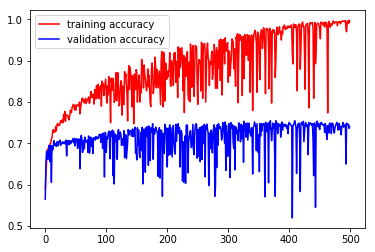

In [35]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

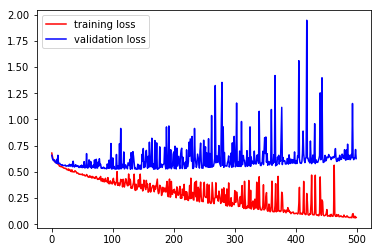

In [36]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training loss': 'r', 'validation loss':'b'})
plt.show()

In [37]:
from keras.layers import Dropout

In [ ]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
#model.add(Dropout(0.8))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

In [ ]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [ ]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [ ]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

In [ ]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [ ]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [ ]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

In [ ]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [ ]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

### Early Stopping

In [ ]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
estop = EarlyStopping(monitor='val_acc', patience=10)

In [ ]:
history = model.fit(X_train, Y_train, epochs=1000, batch_size=512,validation_data=(X_valid,Y_valid), callbacks=[estop])

## Problem 5 - More time to Train

### BatchNormalization

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=512,validation_data=(X_valid,Y_valid))

## Problem 6 - Not an Appropriate Architecture for the problem

In [ ]:
from keras.applications import vgg16, resnet50

In [ ]:
images = []
for img_loc in data.images:
    img = image.load_img('../datasets/emergency_classification/' + img_loc, target_size=(224, 224))
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [ ]:
train_x = vgg16.preprocess_input(images, mode='tf')
train_y = data.emergency_or_not.values

In [ ]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [ ]:
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [ ]:
for layer in base_model.layers:
    layer.Trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
base_model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=3, batch_size=32,validation_data=(X_valid,Y_valid))